# Trabajo 2 
## Estimación y Predicción en Series Temporales 
## Año 2023

### Datos del estudiante

*   **Nombre:** Federico Bello
*   **Cédula:** 4.993.837-3
*   **Firma:** (imagen o firma digital)


<hr>

**Nota:** Para trabajar, hágase una copia propia de este notebook en su espacio de Google Drive, o bien descárguese el archivo `.ipynb` y trabaje localmente con jupyter. 

<hr>

## Aclaraciones

El objetivo del trabajo es mostrar que el estudiante es capaz de resolver una serie de problemas teóricos e implementar y analizar una serie de problemas prácticos. En el primer caso, es fundamental justificar cualquier paso no trivial de la resolución. En el caso de problemas prácticos, es fundamental analizar y comentar todo resultado que se obtenga.

### Autoría

Esta es una tarea _individual_. Sus ejercicios deben ser resueltos por el estudiante cuyo nombre, cédula y firma se especifican al comienzo de este documento.

No es admisible la realización colectiva de ninguno de los ejercicios ni sus partes. Tampoco es admisible la búsqueda y/o reutilización, total o parcial, de material en Internet u otros medios, así como entregas disponibles de años anteriores.

Sí es admisible y aconsejable consultar, cotejar, e intercambiar ideas y sugerencias con otros estudiantes,  utilizar material de referencia tales como: documentación sobre lenguajes de programación, resultados, definiciones y propiedades matemáticas, incluyendo todo el material expuesto en este curso, tanto teórico como práctico. 

También es admisible la reproducción e inclusión de recetas y código relacionado con aspectos auxiliares, tales como el graficado de funciones, etc., que no hacen al objetivo de los ejercicios. 

### Sanciones

Cualquier violación a las anteriores reglas constituye una _falta disciplinaria_. En primera instancia, dicha falta implica la pérdida de los puntos del obligatorio en su totalidad. En caso de reincidencia, se desvinculará al estudiante del curso y quedará registrado como reprobado.

### Conformidad

Mediante la entrega de este informa firmado, dejo constancia de que:

i) He leído y estoy de acuerdo con lo anteriormente expuesto.   
ii) He resuelto por mi propia cuenta los ejercicios, sin recurrir a trabajos de otros compañeros, o soluciones existentes.   
iii) No se incluyen partes ni fragmentos tomados de otras fuentes, salvo las excepciones mencionadas.


## Ejercicio 1 - Regresión polinomial (15 pts)

Considere el problema de ajuste polinomial o *curve fitting.* El modelo para los datos es entonces

$$x[n] = \sum^{p-1}_{k=0} A_kn^k + w[n] \quad n=1,2,\dots,N$$

donde $w[n] \sim N(0,\sigma^2)$. Se desea estimar $\{A_0,A_1,\dots,A_{p-1}\}$. 

1. Plantear el problema como $ \boldsymbol{x}=\boldsymbol{H} \boldsymbol{\theta}+\boldsymbol{w}$,  encontrar el estimador MVU para $\boldsymbol{\theta}$
y dar la matriz de información de Fisher para este problema.
2. Verifique experimentalmente los resultados para el caso $p=4$ (ajuste de un polinomio de grado 3). Para ésto se utilizan los coeficientes:

$$ A_0 = -9, A_1 = 0.73, A_2 = -0.016, A_3 = 0.0001 $$

> Genere un conjunto de $N=100$ muestras, considerando para el proceso de ruido un $\sigma^2=10$. Luego estime los valores de los coeficientes $A_0,\dots,A_3$. Compare gráficamente los polinomios resultantes.






--------------------------
### Respuesta: 


1. Por un lado, se tiene que $\theta$, el parametro a estimar vale:

$$\theta = \begin{bmatrix} A_0 \\ A_1 \\ \vdots \\ A_p  \end{bmatrix}$$

Por otro lado, la matriz de diseño $\boldsymbol{H}$ se quiere que la primer fila tenga:

$$n=0 \longrightarrow \begin{bmatrix} A_0 & A_1 & \dots & A_p \end{bmatrix}$$
La segunda fila:

$$n=1 \longrightarrow \begin{bmatrix} A_0*2 & A_1*2^2 & \dots & A_p*2^N \end{bmatrix}
$$

Y la i-esima fila:

$$
n=i \longrightarrow \begin{bmatrix} A_0*i & A_1*i^2 & \dots & A_p*i^N \end{bmatrix}
$$

Por lo tanto, la matriz de diseño $\boldsymbol{H}$ es:
$$
\boldsymbol{H} = \begin{bmatrix} 1 & 1 & \dots & 1 \\ 1 & 2^2 & \dots & 2^p \\ \vdots & \vdots & \vdots & \vdots \\ 1 & n^2 & \dots & n^p \end{bmatrix}
$$

Con esto, se puede calcular el estimador MVU como:
$$
\hat{\theta} = (\boldsymbol{H}^T\boldsymbol{H})^{-1}\boldsymbol{H}^T\boldsymbol{x}
$$


La Matriz de Información de Fisher ($\mathcal{I}$) para los parámetros $\boldsymbol{A} = [A_0, A_1, \ldots, A_{p-1}]^T$ se define como:
$$
\mathcal{I}(\boldsymbol{A}) = \mathbb{E}\left[ \left(\frac{\partial \log f(X|\boldsymbol{A})}{\partial \boldsymbol{A}}\right) \left(\frac{\partial \log f(X|\boldsymbol{A})}{\partial \boldsymbol{A}}\right)^T \right],
$$
donde $f(X|\boldsymbol{A})$ es la función de verosimilitud de los datos dado $\boldsymbol{A}$.



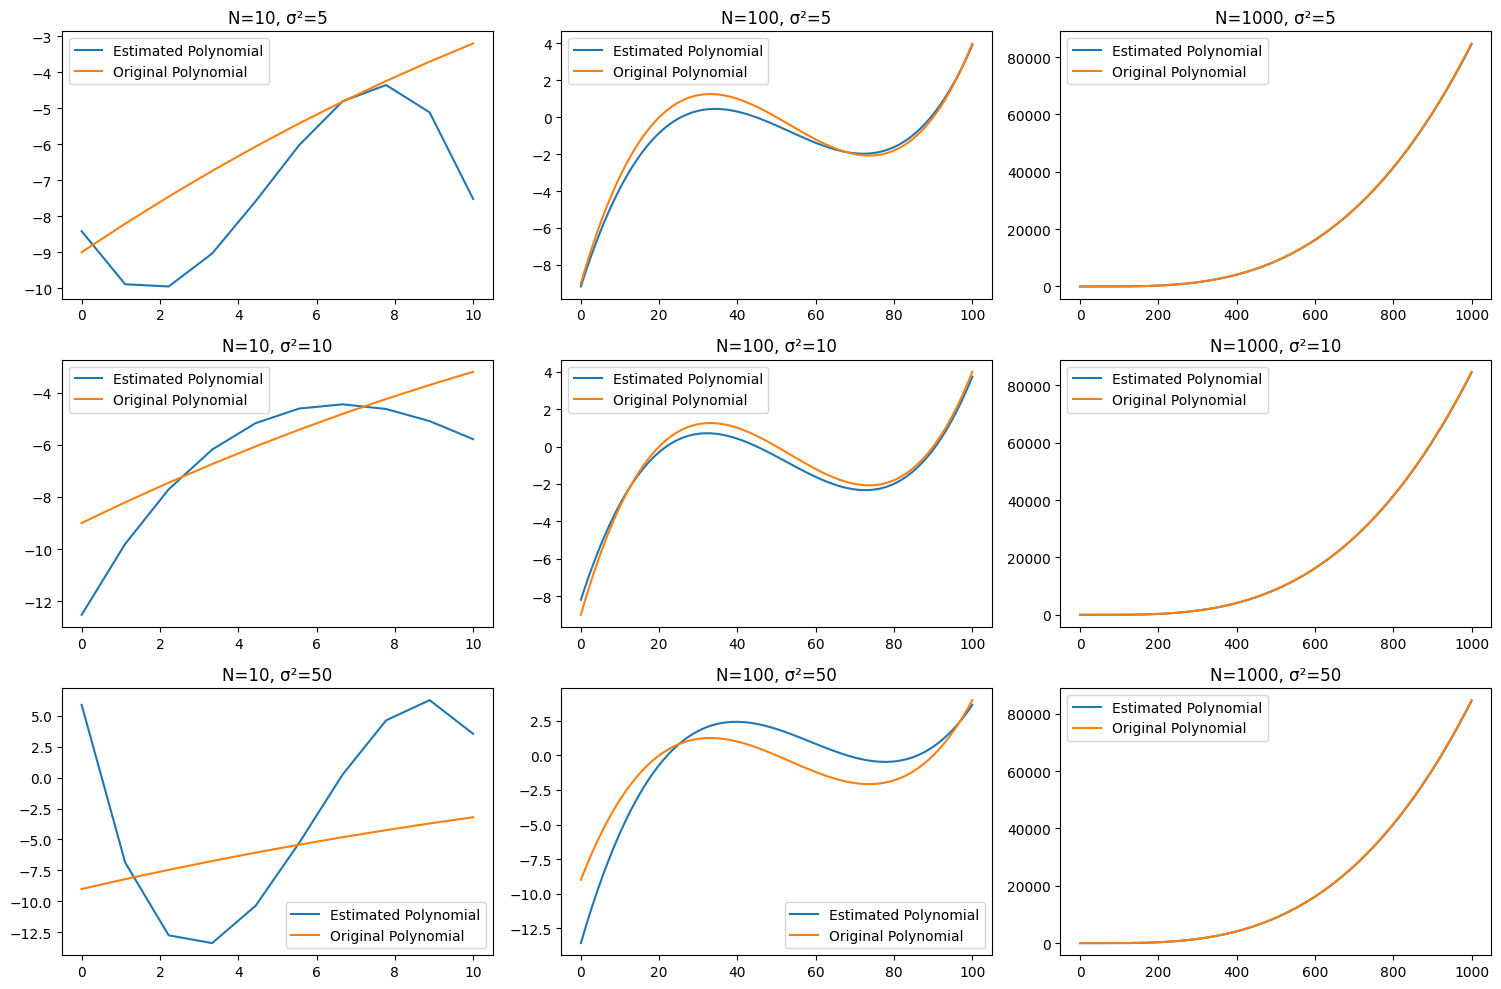

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Parámetros iniciales
p = 4 
A = [-9, 0.73, -0.016, 0.0001]
sigma2_values = [5, 10, 50]
N_values = [10,100,1000]

def obtener_datos(N, p, A, sigma):
    xs = []
    for n in range(N):
        sum = 0
        for k in range(p):
            sum += A[k]*n**k
        xs.append(sum + rnd.normal(0, sigma))
    return xs

def crear_matriz_H(N, p):
    H = np.zeros((N,p))
    for i in range(N):
        for j in range(p):
            H[i][j] = (i+1)**j
    return H

def estimar_coeficientes(H, xs):
    return np.linalg.inv(H.T @ H) @ H.T @ xs

fig, axes = plt.subplots(len(sigma2_values), len(N_values), figsize=(15, 10))

for i, sigma2 in enumerate(sigma2_values):
    sigma = np.sqrt(sigma2)
    for j, N in enumerate(N_values):
        xs = obtener_datos(N, p, A, sigma)
        H = crear_matriz_H(N, p)
        A_est = estimar_coeficientes(H, xs)

        x = np.linspace(0, N, N)
        y_est = np.polyval(A_est[::-1], x)
        y_original = np.polyval(A[::-1], x)
        
        ax = axes[i][j]
        ax.plot(x, y_est, label='Estimated Polynomial')
        ax.plot(x, y_original, label='Original Polynomial')
        ax.set_title(f'N={N}, σ²={sigma2}')
        ax.legend()

plt.tight_layout()
plt.show()


## Ejercicio 2 - MLE (20 pts)

Considerar las observaciones

$$x[n] = A\cdot s[n] + w[n]\,, \quad n=0,1,\dots,N-1$$

donde $s[n]$ es una señal conocida y $w[n] \sim N(0,\sigma ^2)$ y $-\infty < A < \infty$.

1. Encontrar el MLE para $A$
2. Determinar la densidad de probabilidad del MLE
3. Interpretar el resultado anterior. ¿Qué sucede cuando $N \to +\infty$?


----------

#### Respuesta: 

Para encontrar el MLE para $A$, se debe plantear la función de verosimilitud y maximizarla. La función de verosimilitud se define como:
$$
\hat{\theta}_{MLE}(x_0) = \arg \max_{\theta} \log p(x=x_0; \theta)
$$

donde $p(x=x_0; \theta)$ es la PDF del modelo de generacion de los datos. En este caso, la PDF de $x[n]$ es una normal con media $A\cdot s[n]$ y varianza $\sigma^2$. Por lo tanto, la función de verosimilitud es:
$$
p(x[n]; A) = \prod_{n=0}^{N-1}\frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x[n]-A\cdot s[n])  \right) =  \frac{1}{\sqrt{2\pi \sigma^2}^{\frac{N}{2}}} \exp\left(-\frac{1}{2\sigma^2}\sum_{n=0}^{N-1}(x[n] - A\cdot s[n])^2\right)
$$

Tomando el logaritmo, se obtiene: 
$$
\log p(x[n]; A) = -\frac{N}{2}\log(2\pi \sigma^2) - \frac{1}{2\sigma^2}\sum_{n=0}^{N-1}(x[n] - A\cdot s[n])^2
$$

Finalmente, se deriva e iguala a cero para encontrar el MLE:
$$
\frac{\partial \log p(x[n]; A)}{\partial A} = \frac{1}{\sigma^2}\sum_{n=0}^{N-1}(x[n] - A\cdot s[n])s[n] = 0 = \sum_{n=0}^{N-1}(x[n] - A\cdot s[n])s[n] = \sum_{n=0}^{N-1}x[n]s[n] - \sum_{n=0}^{N-1}A s[n]s[n] = 0
$$

Despejando $A$ se obtiene que el MLE es:
$$
\hat{A} = \frac{\sum_{n=0}^{N-1}x[n]s[n]}{\sum_{n=0}^{N-1}s[n]^2}
$$

2. Para determinar la densidad de probabilidad del MLE se debe calcular la matriz de información de Fisher. La matriz de información de Fisher se define como:
$$
\mathcal{I}(\theta) = -\mathbb{E}\left[\frac{\partial^2 \log p(x; \theta)}{\partial \theta^2}\right]
$$
Por lo tanto, se debe calcular la segunda derivada de $\log p(x; \theta)$ con respecto a $A$ y evaluarla en el MLE.
$$
\frac{\partial^2 \log p(x; A)}{\partial A^2} = -\frac{1}{\sigma^2}\sum_{n=0}^{N-1}s[n]^2 
$$

Por lo tanto, la matriz de información de Fisher es:
$$
\mathcal{I}(A) = \frac{N}{\sigma^2}\sum_{n=0}^{N-1}s[n]^2 
$$

3. Cuando $N \to +\infty$, la matriz de información de Fisher se va a infinito, lo que implica que la varianza del MLE tiende a cero. Esto significa que el estimador es consistente y asintóticamente eficiente.
-------------

In [26]:
# Para verificar el resultado:

N = 1000
sigma2 = 10
s =  np.arange(N) # np.ones(N) # probar con distintas funciones (que no sea la funcion nula)
A = 10 
xs = [] 
for n in range(N):
    xs.append(A*s[n] + rnd.normal(0, sigma2))

A_gorro = np.sum(xs*s)/np.sum(s**2)
print(A_gorro)

9.999391312582482


## Ejercicio 3 - MAP (30 pts)

En un experimento se quiere encontrar la recta que mejor aproxima al conjunto de datos

$$x[n] = A + B\cdot n + w[n], \quad 0\leq n \leq N-1,$$

donde el error de medida se modela como $w[n] \sim \mathcal{N}(0,\sigma^2)$.

1. Encontrar los estimadores de máxima verosimilitud de A y B.
2. Simular y graficar los valores estimados en función de N, para $B \neq 0$.  

3. Encontrar el MAP de $A$ y $B$ asumiendo que $A$ y $B$ son variables aleatorias independientes de $w[n]$ con densidad conjunta:

$$\begin{bmatrix}A \\ B\end{bmatrix} \sim N\left( \begin{bmatrix} A_0 \\ B_0 \end{bmatrix}, \begin{bmatrix} \sigma^2_A & 0 \\ 0 & \sigma^2_B \end{bmatrix} \right)$$

4. Verificar experimentalmente que el uso de información a priori mejora la predicción. Comparar con el MLE para $N=30$, $\sigma^2=2$, $\sigma_A^2=1$, $\sigma_B^2=3$, $A_0 = 5$, $B_0 = 2$.

5. ¿Cuál de los dos parámetros se ve más beneficiado por la incorporación de la información a priori? Justificar formalmente. (Puede comentar a partir de la matriz de precisión) 


#### Respuesta:

1. Para calcular los MLE de $A$ y $B$, se sigue un razonamiento similar al anterior. La funcion de verosimilitud en este caso es:
$$
p(x[n]; A, B) = \prod_{n=0}^{N-1}\frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(x[n]-A - B\cdot n)  \right) =  \frac{1}{\sqrt{2\pi \sigma^2}^{\frac{N}{2}}} \exp\left(-\frac{1}{2\sigma^2}\sum_{n=0}^{N-1}(x[n] - A - B\cdot n)^2\right)
$$

Aplicando el logartimo se obtiene:
$$
\log p(x[n]; A, B) = -\frac{N}{2}\log(2\pi \sigma^2) - \frac{1}{2\sigma^2}\sum_{n=0}^{N-1}(x[n] - A - B\cdot n)^2
$$

Y derivando segun $A$ y $B$ e igualando a cero se obtiene que los MLE son:
$$
\hat{A} = \frac{\sum_{n=0}^{N-1}x[n] - B\cdot n}{N}
$$
$$
\hat{B} = \frac{\sum_{n=0}^{N-1}nx[n] - An}{\sum_{n=0}^{N-1}n^2}
$$

In [39]:
N = 1000
sigma2 = 10
A = 10
B = 5
xs = []
for n in range(N):
    xs.append(A + B*n + rnd.normal(0, sigma2))

A_gorro= 0
for n in range(N):
    A_gorro += xs[n] - B*n
A_gorro = A_gorro/N

B_gorro = 0
for n in range(N):
    B_gorro += xs[n]*n - A*n
B_gorro = B_gorro/np.sum(np.array(range(N))**2)
print(A_gorro, B_gorro)


9.925392203279207 4.999845627384472
